In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the first dataset by url from my GitHub
population_url = 'https://raw.githubusercontent.com/garyod/UCDPA_Gary_ODonoghue/main/world_pop_1950_2100.csv'
population_data = pd.read_csv(population_url)

# Printing the first 10 rows to make sure it imported correctly
display(population_data.head(10))




,Location,Variant,Time,TPopulation1Jan,TPopulation1July
0,World,Medium,1950,2477674732,2.499322e+09
1,World,Medium,1951,2520969582,2.543130e+09
2,World,Medium,1952,2565291179,2.590271e+09
3,World,Medium,1953,2615250618,2.640279e+09
4,World,Medium,1954,2665306975,2.691979e+09
5,World,Medium,1955,2718651703,2.746072e+09
6,World,Medium,1956,2773492579,2.801003e+09
7,World,Medium,1957,2828512683,2.857867e+09
8,World,Medium,1958,2887221030,2.916108e+09
9,World,Medium,1959,2944995164,2.970292e+09


In [144]:
# Importing the second dataset by url from my GitHub
passenger_url = 'https://raw.githubusercontent.com/garyod/UCDPA_Gary_ODonoghue/main/Passengers.csv'
passenger_data = pd.read_csv(passenger_url)

# Printing the first 10 rows to make sure it imported correctly
display(passenger_data.head(10))



,Year,Passengers divided by 1 Billion,Domestic,International
0,1980,0.793,0.629,0.163
1,1981,0.797,0.624,0.173
2,1982,0.811,0.641,0.170
3,1983,0.845,0.672,0.173
4,1984,0.898,0.714,0.185
5,1985,0.952,0.758,0.194
6,1986,1.017,0.818,0.198
7,1987,1.089,0.867,0.222
8,1988,1.147,0.904,0.243
9,1989,1.186,0.924,0.262


In [145]:
# Now I am going to sort out the data of the first dataset, population. 

In [146]:
population_data = pd.read_csv(population_url)

# Drop uneeded columns using .loc from the population dataset, I will take the the population date from the 1st Jan and drop the other column
selected_cols = ['Time', 'TPopulation1Jan']
population_data = population_data.loc[:, selected_cols]

# Printing to make sure it is correct
print(population_data.head(5))

   Time  TPopulation1Jan
0  1950       2477674732
1  1951       2520969582
2  1952       2565291179
3  1953       2615250618
4  1954       2665306975


In [147]:
# Check shape and type of the population dataset
print(population_data.shape)    
print(population_data.dtypes)  



(152, 2)
Time               int64
TPopulation1Jan    int64
dtype: object


In [148]:
# Change population to float to avoid any decimal place issues later on
population_data['TPopulation1Jan'] = population_data['TPopulation1Jan'].astype('float64')

# Check type to confirm changes
print(population_data.dtypes)  

Time                 int64
TPopulation1Jan    float64
dtype: object


In [149]:
# Change name of population column for better readability
population_data = population_data.rename(columns={'TPopulation1Jan': 'Total Population'})

# Change name of Time column to year to allign with the second dataset
population_data = population_data.rename(columns={'Time': 'Year'})

# Allign Year ranges with second dataset
population_data = population_data[(population_data['Year'] >= 1980) & (population_data['Year'] <= 2020)]

# Reset the row index of the DataFrame so as the first row is not goint to be indexed as row 30
population_data.reset_index(drop=True, inplace=True)

# Divide the population column by a billion and round to 2 decimal places for easier legibility of the graphs later on
population_data['Total Population'] = (population_data['Total Population'] / 1_000_000_000).round(2)
 
# Print to make sure it is correct
print(population_data.head(5))

# Check shape of the population dataset to confirm
print(population_data.shape)  

   Year  Total Population
0  1980              4.40
1  1981              4.48
2  1982              4.57
3  1983              4.65
4  1984              4.73
(41, 2)


In [150]:
# Now I am going to sort out the data of the second dataset, passengers. 

In [151]:
passenger_data = pd.read_csv(passenger_url)

# Drop uneeded columns using .loc from the population dataset, I will take the the population date from the 1st Jan and drop the other column
selected_cols = ['Year', 'Passengers divided by 1 Billion']
passenger_data = passenger_data.loc[:, selected_cols]

# Round to 2 decimal places to allign with the population dataset
passenger_data['Passengers divided by 1 Billion'] = (passenger_data['Passengers divided by 1 Billion']).round(2)

# Printing to make sure it is correct
print(passenger_data.head(5))

   Year  Passengers divided by 1 Billion
0  1980                             0.79
1  1981                             0.80
2  1982                             0.81
3  1983                             0.84
4  1984                             0.90


In [152]:
# Check shape and type of the passenger dataset
print(passenger_data.shape)    
print(passenger_data.dtypes)  


(41, 2)
Year                                object
Passengers divided by 1 Billion    float64
dtype: object


In [153]:
# As I got an error trying to convert the Year column to int64 it appears 2 of the Years have added characters causing the error
# The years 2019 and 2020 are wrongly named 2019* and 2020* and will have to be renamed to remove the asterisks
passenger_data['Year'] = passenger_data['Year'].replace({'2019*': '2019', '2020*': '2020'})

In [154]:
# Convert the Year column to int64
passenger_data['Year'] = passenger_data['Year'].astype('int64')

# Print types to confirm changes
print(passenger_data.dtypes) 
print(passenger_data.head(5))

Year                                 int64
Passengers divided by 1 Billion    float64
dtype: object
   Year  Passengers divided by 1 Billion
0  1980                             0.79
1  1981                             0.80
2  1982                             0.81
3  1983                             0.84
4  1984                             0.90


In [155]:
# Now I will merge the datasets
merged_data = passenger_data.merge(population_data, on='Year', how='outer')

display(merged_data.head(10))

,Year,Passengers divided by 1 Billion,Total Population
0,1980,0.79,4.40
1,1981,0.80,4.48
2,1982,0.81,4.57
3,1983,0.84,4.65
4,1984,0.90,4.73
5,1985,0.95,4.82
6,1986,1.02,4.91
7,1987,1.09,5.00
8,1988,1.15,5.09
9,1989,1.19,5.18


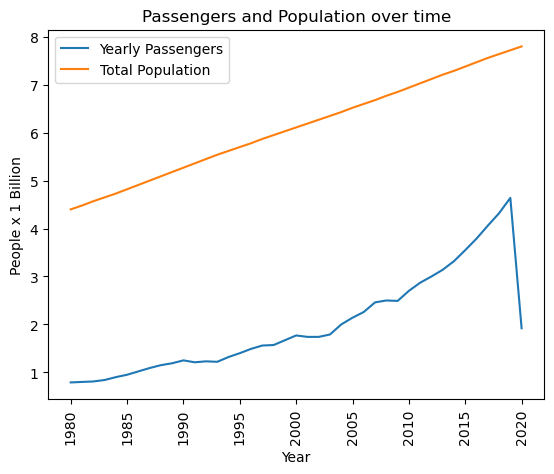

In [156]:
# Now I will plot the data

# Create a Figure and axis
fig, ax = plt.subplots()

# Set the x-axis to be the Year column
x = merged_data['Year']

# Set the y-axis to be the range of 1 to 10
y = range(1, 11)

# Plot the Passengers divided by 1 Billion column against the Year column
ax.plot(x, merged_data['Passengers divided by 1 Billion'], label='Yearly Passengers')

# Plot the Total Population column against the Year column
ax.plot(x, merged_data['Total Population'], label='Total Population')

# Set the x-axis label
ax.set_xlabel('Year')

# Set the y-axis label
ax.set_ylabel('People x 1 Billion')

# Set the title of the plot
ax.set_title('Passengers and Population over time')

# Add a legend to the plot
ax.legend()

# Use for loop to rotate X-Axis labels for legibility 
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

# Show the plot
plt.show()

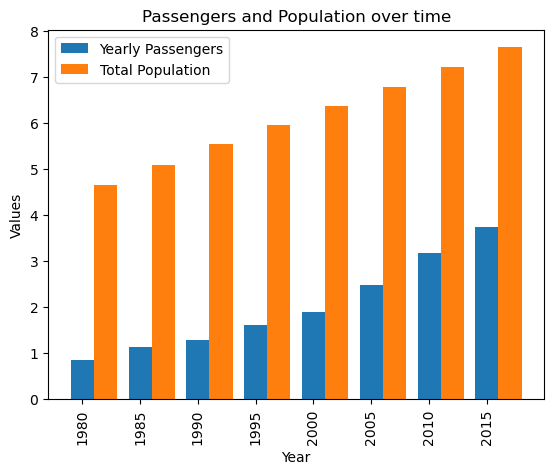

In [158]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Group the data by 5 Year intervals and calculate the mean
merged_data['Year_Group'] = pd.cut(merged_data['Year'], bins=np.arange(1980, 2025, 5))
merged_data_grouped = merged_data.groupby('Year_Group').mean()

# Set the x-axis to be the year intervals
x = np.arange(1981, 2021, 5)

# Set the width of the bars
width = 2.00

# Set the position of the bars on the x-axis
pos1 = x - width/2
pos2 = x + width/2

# Create the bars for the 'Passengers divided by 1 Billion' column
ax.bar(pos1, merged_data_grouped['Passengers divided by 1 Billion'], width, label='Yearly Passengers')

# Create the bars for the 'Total Population' column
ax.bar(pos2, merged_data_grouped['Total Population'], width, label='Total Population')

# Set the x-axis label
ax.set_xlabel('Year')

# Set the y-axis label
ax.set_ylabel('Values')

# Set the title of the plot
ax.set_title('Passengers and Population over time')

# Add a legend to the plot
ax.legend()

# Use for loop to rotate X-Axis labels for legibility 
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

# display the plot
plt.show()